# Estimating Economic Growth using Deep Learning

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [2]:
data = pd.read_csv('data_change_final.csv')
data

,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,age_dependency_ratio,food_production_index,human_capital_index,...,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita_change
0,-2.849774e+08,6.070487e+08,9.919000,5886907.0,116.3,3023.20,2.289413e+08,102.663238,98.77,0.437499,...,19.760000,18.000000,23680871.0,67.580448,46.231,10.704,-20393.25,2.085294e+09,1.265641e+09,-11.916132
1,-2.558925e+08,7.904626e+08,8.830000,6198355.0,112.1,4244.00,2.089063e+08,101.562371,96.05,0.437499,...,19.091144,18.963333,24726684.0,65.520050,45.507,10.356,-105319.20,1.722979e+09,1.520410e+09,-0.881195
2,-2.356262e+08,9.238376e+08,5.750358,6483460.0,107.9,2675.60,1.976982e+08,100.349127,106.32,0.437499,...,21.744152,0.000000,25654277.0,60.358543,44.723,10.003,-183431.65,1.931964e+09,1.664800e+09,7.581516
3,-1.671812e+08,8.078992e+08,6.204500,6644359.0,103.7,2833.15,1.732177e+08,100.970943,97.63,0.433682,...,22.674953,0.000000,26433049.0,57.309657,43.870,9.645,-102640.95,1.862220e+09,1.834569e+09,3.989521
4,-3.088863e+08,1.275667e+09,6.518000,6770366.0,99.5,2357.15,2.666646e+08,101.600183,108.92,0.458621,...,24.618376,0.000000,27100536.0,68.419065,42.944,9.287,-1046361.00,2.234193e+09,1.995021e+09,27.823689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4707,-1.647262e+08,-1.664565e+08,5.370000,6194591.0,81.4,8541.00,1.105866e+08,81.230012,88.43,0.456140,...,23.640000,20.000000,12894316.0,83.582710,36.526,12.384,-128308.20,5.846768e+08,1.465445e+09,57.943425
4708,-1.608996e+08,-1.106623e+09,14.496500,6285545.0,73.8,9491.00,1.308970e+08,81.775797,94.08,0.463222,...,15.200000,19.800000,13115131.0,76.182669,36.292,11.167,-622997.00,6.332076e+08,1.993847e+09,76.923250
4709,-1.568699e+08,-3.966485e+08,13.044500,6385796.0,67.8,9782.00,1.382525e+08,82.350264,92.05,0.462221,...,21.990000,19.600000,13350356.0,78.333111,35.768,10.115,-123286.35,5.735512e+08,1.910608e+09,1.155332
4710,-1.993179e+08,-2.492056e+08,4.770000,6486791.0,64.4,9465.00,1.420632e+08,82.840045,91.23,0.462221,...,14.700000,17.700000,13586681.0,88.693420,34.978,9.277,-123286.35,7.187512e+08,1.949359e+09,3.585083


## Splitting the data into training and validation data

In [3]:
X = data.drop('gdp_per_capita_change', axis=1)
y = data.gdp_per_capita_change

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Building the Deep Learning model

In [5]:
input_shape = [X_train.shape[1]]

In [6]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [7]:
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=opt,
    loss='mae',
)

early_stopping = callbacks.EarlyStopping(
    min_delta=0.1,
    patience=20,
    restore_best_weights=True,
)

## Training the model

Epoch 1/400
30/30 [==============================] - 2s 23ms/step - loss: 1303.7021 - val_loss: 1235.3531
Epoch 2/400
30/30 [==============================] - 0s 7ms/step - loss: 1212.6195 - val_loss: 1233.5673
Epoch 3/400
30/30 [==============================] - 0s 6ms/step - loss: 1438.8960 - val_loss: 1233.1256
Epoch 4/400
30/30 [==============================] - 0s 6ms/step - loss: 1160.7760 - val_loss: 1231.9297
Epoch 5/400
30/30 [==============================] - 0s 7ms/step - loss: 1418.8320 - val_loss: 1231.4960
Epoch 6/400
30/30 [==============================] - 0s 7ms/step - loss: 1410.1183 - val_loss: 1229.8949
Epoch 7/400
30/30 [==============================] - 0s 7ms/step - loss: 972.4137 - val_loss: 1228.0751
Epoch 8/400
30/30 [==============================] - 0s 8ms/step - loss: 1170.8236 - val_loss: 1226.4451
Epoch 9/400
30/30 [==============================] - 0s 7ms/step - loss: 1340.3822 - val_loss: 1224.5986
Epoch 10/400
30/30 [==============================] - 0

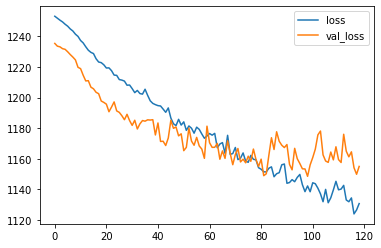

In [8]:
epochs = 400
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=epochs,
    callbacks=[early_stopping],
    verbose=1,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

## Testing the model

In [9]:
test_loss = model.evaluate(
    X_test, y_test,
    verbose=0,
)
print('Mean Absolute Error:', test_loss)

Mean Absolute Error: 1230.848876953125


In [10]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(len(y_test))
corr_matrix = np.corrcoef(y_test, y_pred)
corr = corr_matrix[0, 1]
r2 = corr ** 2
print('Coefficient of determination:', r2)

Coefficient of determination: 0.10941950409218888
